# Primeiro passos com sktime e modelo Naive

Considerando o nosso exemplo da caixa com bolas pretas e vermelhas, um modelo simples para prever a próxima bola que vamos tirar da caixa é o **Modelo Naive**. 

Existem algumas versões de modelo naive:

* **Naive (last)**: a previsão para o próximo ponto é igual ao último ponto observado. 
* **Naive (mean)**: a previsão para o próximo ponto é igual à média dos pontos observados numa janela passada.
* **Naive Sazonal**: a previsão para o próximo ponto é igual ao ponto observado na mesma posição em um ciclo anterior. Por exemplo, se estamos prevendo vendas diárias e hoje é segunda-feira, a previsão para hoje é igual às vendas da última segunda-feira.
  

Esse modelo é simples, mas é extremamente eficaz e dificil de ser vencido em muitos casos.
No cenário onde os dados não vêm organizados em nenhuma ordem específica, a melhor aposta que podemos fazer é o valor médio das bolas no histórico recente.

Vamos ver como fazer um forecast simples com sktime, usando o modelo Naive.

## Exemplo prático com sktime

Aqui, baixamos o dataset simples que vem na biblioteca desse repositório.

In [1]:
from tsbook.datasets.simple import SimpleDataset


dataset = SimpleDataset(True)
y = dataset.load("y")

y.head()

,points
2021-01-01,0
2021-01-02,0
2021-01-03,0
2021-01-04,1
2021-01-05,1


Esse é um dataset simples com uma série temporal mensal. Vamos dividir os dados em treino e teste, usando os últimos 36 meses como teste. Para isso, devemos respeitar a ordem temporal dos dados.

A função `temporal_train_test_split` faz isso para nós.

In [2]:
from sktime.forecasting.model_selection import temporal_train_test_split
y_train, y_test = temporal_train_test_split(y, test_size=36)

Também temos uma função de plotagem simples para visualizar séries temporais.

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='points'>)

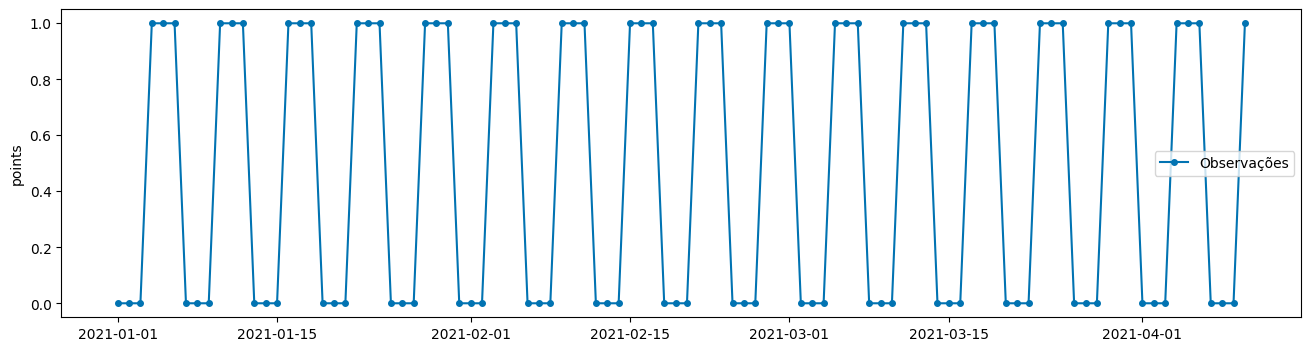

In [3]:
from sktime.utils.plotting import plot_series

plot_series(y, labels=["Observações"])

### Criando o modelo

No sktime, os modelos são usados em 3 passos:

* Inicialização (`__init__`): aqui, definimos os hiperparâmetros do modelo. Pense nessa parte como a configuração do modelo.
* Treinamento (`fit`): aqui, o modelo aprende com os dados de treino.
* Previsão (`predict`): com esse método, o modelo faz previsões para os dados futuros.

Quando inicializamos o modelo em um notebook, o sktime mostra uma ilustração do modelo, o que é útil para entender o que está acontecendo "por baixo dos panos".
Em casos mais complexos com composição de modelos, isso pode ser útil para ilustrar o que estamos fazendo para outros cientistas.

In [4]:
from sktime.forecasting.naive import NaiveForecaster

model = NaiveForecaster(strategy="last")
model

NaiveForecaster()

Ao treinar o modelo, passamos dados de treinamento.

In [5]:
model.fit(y_train)

NaiveForecaster()

Para a previsão, temos que passar um argumento obrigatório: `fh`, abreviatura de "forecasting horizon" (horizonte de previsão). Tipicamente passamos um `fh` relativo, ou seja, no formato de uma lista 

In [6]:
model.predict(fh=[1,2,3,4])

,points
2021-03-06,1.0
2021-03-07,1.0
2021-03-08,1.0
2021-03-09,1.0


Onde cada número representa o número de períodos à frente que queremos prever. Também podemos passar o `fh` como um índice de tempo absoluto, que é o que faremos aqui. Vamos passar o índice de tempo do conjunto de teste.

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='points'>)

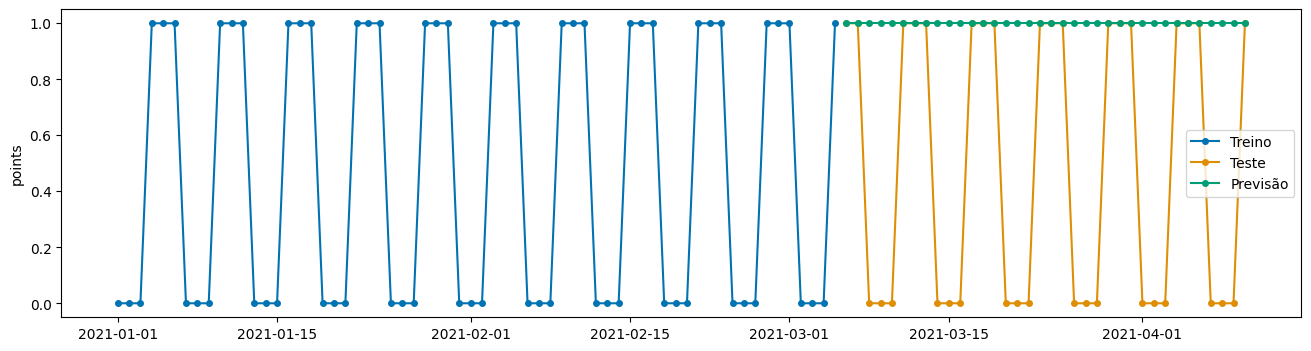

In [7]:
y_pred = model.predict(fh=y_test.index)

plot_series(y_train, y_test, y_pred, labels=["Treino", "Teste", "Previsão"])

### Ajustando hiperparâmetros

Para alterar hiperparametros de um modelo já existente, podemos usar o método `set_params`, que modifica *in-place* os hiperparâmetros do modelo.

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='points'>)

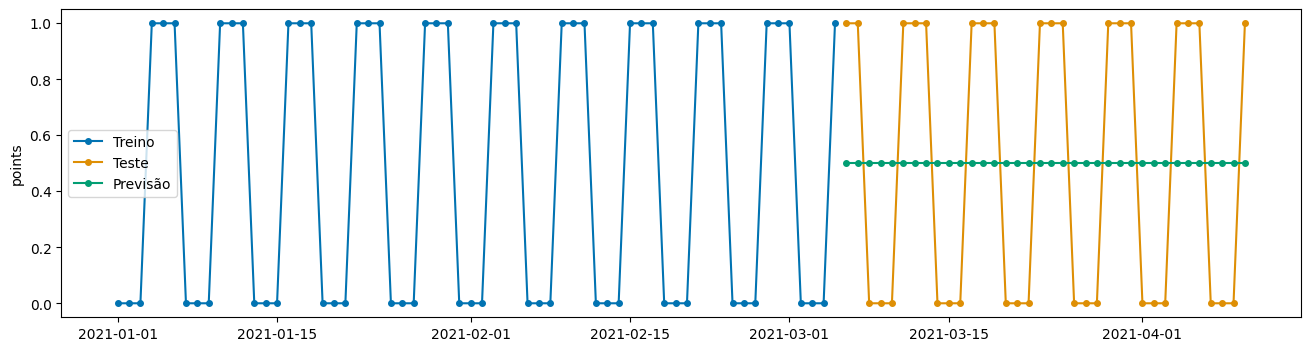

In [8]:
model.set_params(
    strategy="mean",
    window_length=12,
)

model.fit(y_train)
y_pred = model.predict(fh=y_test.index)


plot_series(y_train, y_test, y_pred, labels=["Treino", "Teste", "Previsão"])

Podemos também testar o Naive sazonal, que repete a última observação de `6` períodos atrás.

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='points'>)

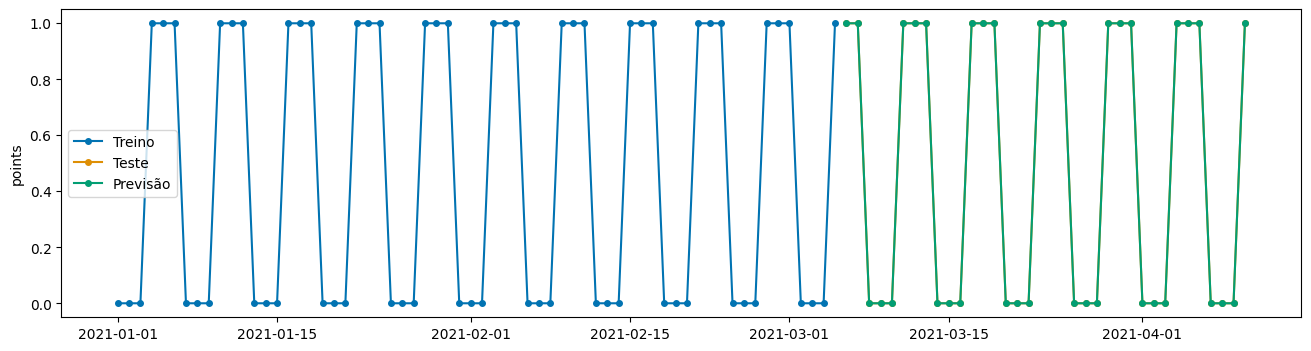

In [9]:
model.set_params(
    sp=6,
    strategy="last"

)
model.fit(y_train)
y_pred = model.predict(fh=y_test.index)
plot_series(y_train, y_test, y_pred, labels=["Treino", "Teste", "Previsão"])

Claro, como esse exemplo é muito simples, o modelo naive sazonal captura perfeitamente a sazonalidade dos dados. No entanto, vamos ver no próximo capítulo um caso de uso mais realista, com dados de varejo, e estudaremos modelos mais avançados.